1. Preprocessing
2. Clustering with one sample
3. Untegration of multiple samples
4. Find marker genes
5. Plot marker genes
6. Cell labeling
7. Count the fraction of cells
8. Differential expression between two different group of cells
9. DE heatmaps
10. Gene ontology
11. Kegg enrichment
12. Comapre genes and different conditions w/ statistical testing
13. Score & plot cells based on expression of gene signatures




Single cells data --> matrix of cells (columns) x genes (rows)
file types --> .h5 (features) , .gz (barcodes, features, matrix)

10x pipeline --> filtered gene count matrix (feature matrix)

We start w/ raw count CSVs --> cells barcodes (columns) x genes (rows)
* what is a control sample?



In [8]:
%pip show scikit-misc

Name: scikit-misc
Version: 0.3.0
Summary: Miscellaneous tools for scientific computing.
Home-page: https://has2k1.github.io/scikit-misc/stable
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: Copyright (c) 2016, Hassan Kibirige
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
         * Redistributions of source code must retain the above copyright notice,
           this list of conditions and the following disclaimer.
         * Redistributions in binary form must reproduce the above copyright
           notice, this list of conditions and the following disclaimer in the
           documentation and/or other materials provided with the distribution.
         * Neither the name of  nor the names of its contributors may be used to
           endorse or promote products derived from this software without specific
 

In [9]:
!pip show scanpy

Name: scanpy
Version: 1.9.4
Summary: Single-Cell Analysis in Python.
Home-page: 
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/python/3.10.8/lib/python3.10/site-packages
Requires: anndata, h5py, joblib, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [1]:
!wget ftp.ncbi.nlm.nih.gov/geo/series/GSE171nnn/GSE171524/suppl/GSE171524_RAW.tar

--2023-09-04 01:26:44--  http://ftp.ncbi.nlm.nih.gov/geo/series/GSE171nnn/GSE171524/suppl/GSE171524_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 2607:f220:41e:250::12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE171nnn/GSE171524/suppl/GSE171524_RAW.tar [following]
--2023-09-04 01:26:45--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE171nnn/GSE171524/suppl/GSE171524_RAW.tar
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169728000 (162M) [application/x-tar]
Saving to: ‘GSE171524_RAW.tar’

GSE171524_RAW.tar   100%[===================>] 161.87M  35.7MB/s    in 5.1s    

2023-09-04 01:26:50 (31.7 MB/s) - ‘GSE171524_RAW.tar’ saved [169728000/169728000]



In [2]:
!tar xvf GSE171524_RAW.tar

GSM5226574_C51ctr_raw_counts.csv.gz
GSM5226575_C52ctr_raw_counts.csv.gz
GSM5226576_C53ctr_raw_counts.csv.gz


GSM5226577_C54ctr_raw_counts.csv.gz
GSM5226578_C55ctr_raw_counts.csv.gz
GSM5226579_C56ctr_raw_counts.csv.gz
GSM5226580_C57ctr_raw_counts.csv.gz
GSM5226581_L01cov_raw_counts.csv.gz
GSM5226582_L03cov_raw_counts.csv.gz
GSM5226583_L04cov_raw_counts.csv.gz
GSM5226584_L04covaddon_raw_counts.csv.gz
GSM5226585_L05cov_raw_counts.csv.gz
GSM5226586_L06cov_raw_counts.csv.gz
GSM5226587_L07cov_raw_counts.csv.gz
GSM5226588_L08cov_raw_counts.csv.gz
GSM5226589_L09cov_raw_counts.csv.gz
GSM5226590_L10cov_raw_counts.csv.gz
GSM5226591_L11cov_raw_counts.csv.gz
GSM5226592_L12cov_raw_counts.csv.gz
GSM5226593_L13cov_raw_counts.csv.gz
GSM5226594_L15cov_raw_counts.csv.gz
GSM5226595_L16cov_raw_counts.csv.gz
GSM5226596_L17cov_raw_counts.csv.gz
GSM5226597_L18cov_raw_counts.csv.gz
GSM5226598_L19cov_raw_counts.csv.gz
GSM5226599_L21cov_raw_counts.csv.gz
GSM5226600_L22cov_raw_counts.csv.gz


In [3]:
!gzip -d GSM5226574_C51ctr_raw_counts.csv.gz

In [10]:
import os
print(os.getcwd())

/workspaces/scRNA-Sequencing-of-Human-Lung-Dataset


In [1]:
import scanpy as sc

In [2]:
# Read in data
# .T = Transpose -- Scanpy requires the columns to be genes, the rows to be cells
adata = sc.read_csv('/workspaces/scRNA-Sequencing-of-Human-Lung-Dataset/GSM5226574_C51ctr_raw_counts.csv').T
# Call the object as the last line in a cell (works in jupyter notebook)
adata

# adata has 3 components -- adata.obs (cell barcodes) / adata.var (genes) / adata.X (counts)(numpy array)
# adata.X.shape = check the matrix

AnnData object with n_obs × n_vars = 6099 × 34546

# Doublet Removal - Optional but recommended
1. use the Solo package with Scvi
2. DON'T on integrated sample - use on individual samples, integrate them afterwards
3. Filter out the genes and train a model
4. Narrow down the number of genes
5. Keep genes that are found in at least 10 cells


In [3]:
%pip install scvi-tools

Note: you may need to restart the kernel to use updated packages.


In [4]:
import scvi

/home/codespace/.python/current/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/codespace/.python/current/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
%pip show seurat

Name: seurat
Version: 0.0.2
Summary: 
Home-page: 
Author: Mac Prible
Author-email: prible@gmail.com
License: 
Location: /usr/local/python/3.10.8/lib/python3.10/site-packages
Requires: mediapipe, opencv-contrib-python, opencv-python, toml
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Filter out the genes and train a model
# Narrow down the number of genes
# Keep genes that are found in at least 10 cells

sc.pp.filter_genes(adata, min_cells = 10)

In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [8]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [06:56<00:00,  1.00s/it, v_num=1, train_loss_step=338, train_loss_epoch=323]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [06:56<00:00,  1.04s/it, v_num=1, train_loss_step=338, train_loss_epoch=323]


In [9]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 76/400:  19%|█▉        | 75/400 [00:19<01:22,  3.93it/s, v_num=1, train_loss_step=0.38, train_loss_epoch=0.311] 

Epoch 255/400:  64%|██████▍   | 255/400 [01:06<00:37,  3.85it/s, v_num=1, train_loss_step=0.309, train_loss_epoch=0.293]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.312. Signaling Trainer to stop.


In [10]:
solo.predict()

,doublet,singlet
TAGGTACCATGGCCAC-1_1,1.056440,-0.516755
ATTCACTGTAACAGGC-1_1,1.915407,-0.968293
TAACTTCCAACCACGC-1_1,1.263418,-0.202211
TTGGGTACACGACAAG-1_1,0.754443,-0.898048
AGGCCACAGAGTCACG-1_1,1.571520,-0.708351
...,...,...
CGCCATTGTTTGCCGG-1_1,-1.122332,1.849015
CACTGGGGTCTACGTA-1_1,-1.500405,2.479322
CATACTTGTAGAGGAA-1_1,-2.227813,2.807263
TTTGGTTTCCACGGAC-1_1,-3.053674,3.854050


In [11]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df.index = df.index.map(lambda x: x[:-2]) # Adding : next to the number is different from w/o a :
df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1,1.056440,-0.516755,doublet
ATTCACTGTAACAGGC-1,1.915407,-0.968293,doublet
TAACTTCCAACCACGC-1,1.263418,-0.202211,doublet
TTGGGTACACGACAAG-1,0.754443,-0.898048,doublet
AGGCCACAGAGTCACG-1,1.571520,-0.708351,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1,-1.122332,1.849015,singlet
CACTGGGGTCTACGTA-1,-1.500405,2.479322,singlet
CATACTTGTAGAGGAA-1,-2.227813,2.807263,singlet
TTTGGTTTCCACGGAC-1,-3.053674,3.854050,singlet


In [12]:
# Count doublet and singlets
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1199,1199
singlet,4900,4900


20% of the data is doublet which is high

*how much is a typical good range?

we might want to discard this portion of the data but we are going to add the difference between the two columns

In [13]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,1.056440,-0.516755,doublet,1.573196
ATTCACTGTAACAGGC-1,1.915407,-0.968293,doublet,2.883699
TAACTTCCAACCACGC-1,1.263418,-0.202211,doublet,1.465628
TTGGGTACACGACAAG-1,0.754443,-0.898048,doublet,1.652491
AGGCCACAGAGTCACG-1,1.571520,-0.708351,doublet,2.279871
...,...,...,...,...
CGCCATTGTTTGCCGG-1,-1.122332,1.849015,singlet,-2.971348
CACTGGGGTCTACGTA-1,-1.500405,2.479322,singlet,-3.979727
CATACTTGTAGAGGAA-1,-2.227813,2.807263,singlet,-5.035076
TTTGGTTTCCACGGAC-1,-3.053674,3.854050,singlet,-6.907723


In [14]:
import seaborn as sns

In [15]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /home/codespace/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas
Required-by: scanpy


/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


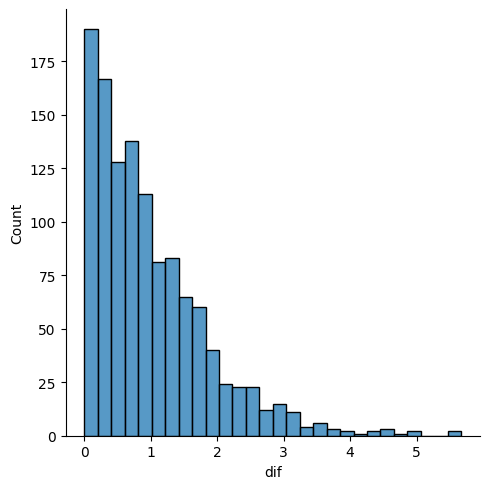

In [16]:
# Plot the distribution of the dataframe - only dif column from the predicted cell doublets
sns.displot(df[df.prediction == 'doublet'], x = 'dif')


A lot of cells predicted doublets that are only marginally higher than the prediction in singlets
We will filter out predictions below 1 (arbitrary selection)

In [17]:
# New dataframe Only the cells predicted doublet
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,1.056440,-0.516755,doublet,1.573196
ATTCACTGTAACAGGC-1,1.915407,-0.968293,doublet,2.883699
TAACTTCCAACCACGC-1,1.263418,-0.202211,doublet,1.465628
TTGGGTACACGACAAG-1,0.754443,-0.898048,doublet,1.652491
AGGCCACAGAGTCACG-1,1.571520,-0.708351,doublet,2.279871
...,...,...,...,...
CAATACGCAATGTGGG-1,0.671308,-0.647675,doublet,1.318983
AACCCAATCTCGACCT-1,1.210163,-0.853625,doublet,2.063787
ATCAGGTGTCGTCTCT-1,1.102188,-1.180955,doublet,2.283143
GGAGGTAGTTAAGCAA-1,1.300003,-0.715047,doublet,2.015050


546 cells that were predicted doublets with high certainity
we will use the barcodes to filter adata (object) on that

In [19]:
# Reload the adata using Scanpy read function
adata = sc.read_csv("/workspaces/scRNA-Sequencing-of-Human-Lung-Dataset/GSM5226574_C51ctr_raw_counts.csv").T

In [20]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [21]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
# is the barcode is this, found in the previous dataframe (in 16), does match any barcode in index call
# if it is a doublet it will be True

In [22]:
# Filter out cells labelled True (doublets)
adata = adata[~adata.obs.doublet] # the ~ means keep the False

In [23]:
adata

View of AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

#Preprocessing

1. Label the genes of mitochonderial origin

Mitochonderial genes are annotated with MT- (human), mouse = Mt- or mt-
Some cases might not use MT

In [24]:
# Filter values starting with MT-
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [25]:
# Add mt column -- True or False
adata.var['mt'] = adata.var.index.str.startswith('MT-')
adata.var

/tmp/ipykernel_16752/2263187484.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


- Label genes of Ribosomal origin

We will use a reference list of Ribosomal genes from broadinstitute

In [26]:
# Label genes of Ribosomal origin
import pandas as pd
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [27]:
# Call the list of the genes
ribo_genes[0].values # Why 0?

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [28]:
# Annotate ribo genes
#                  is gene name in var dataframe, is it in this list 
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


Calculate qc metrics

qc vars correspond to columns mt, ribo

run adata.var again to find a statistics portion for each gene

percent dropout is very high for the majority of the genes

In [29]:
#Calculate QCmetrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [30]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [31]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [32]:
# Sort according to number of genes found in cells
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


inference: some genes were in almost every cell, others were in no cells

In [33]:
# Filter out the genes in at least 3 cells
sc.pp.filter_genes(adata, min_cells=3)

In [34]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


Typically, after that we filter on counts

In [35]:
# Sort by counts
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,False,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,False,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627


Here the data is filter at a cutoff of 400 total counts
if it wasn't we would run

sc.pp.filter_cells(adata, min_genes=200)
picking the minimum no is arbitrary and based on the data at hand

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


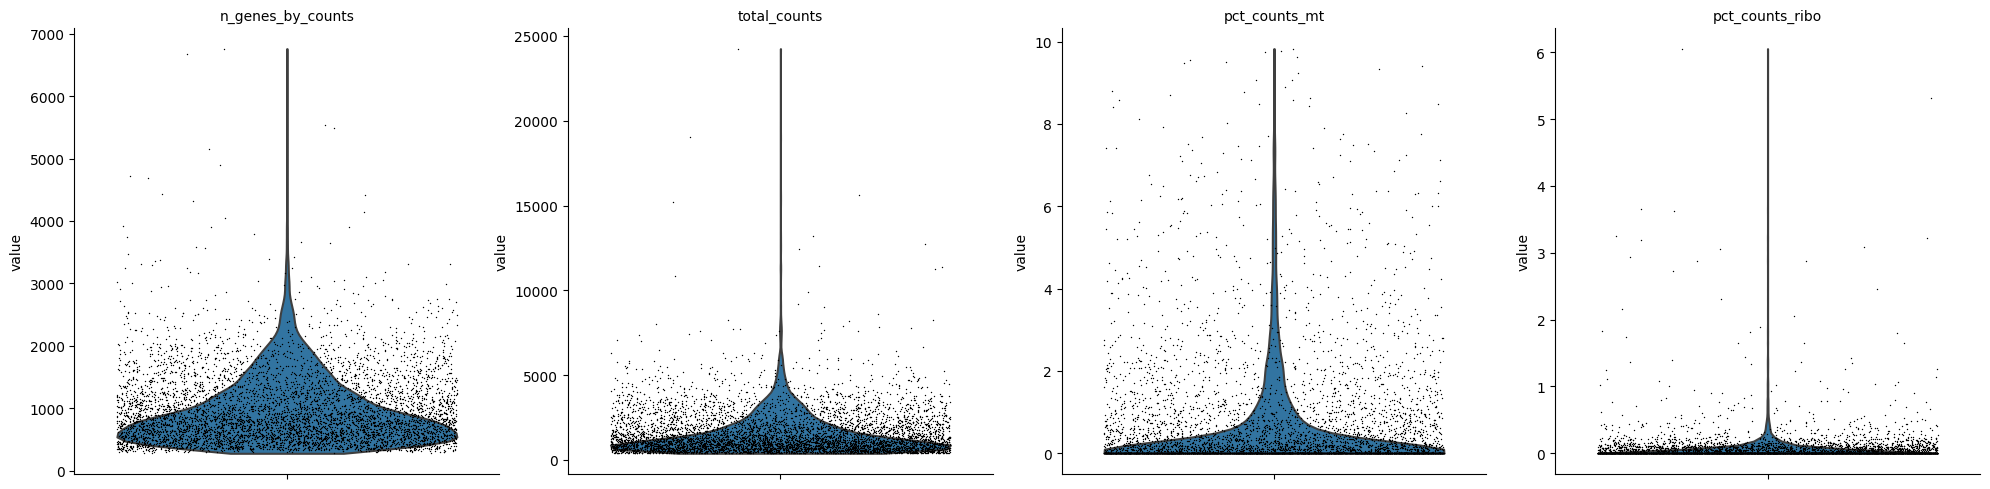

In [36]:
# Plot qc metrics to get rid of outliers
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel= True)
# jitter=0.4, multi_panel= True ?

If a cell has a significantly higher no of genes than average it's likely an artifact

The same goes for counts -- no of genes and counts is highly correlated so we can filter on one of them

There is a high mitochonderial percentage which could be
1. a sequencing artifact
2. the cell is dying

usually a mitochonderial filter in set at 5-20%

For ribosomal counts, most are around zero percent except for some outliers.

In [37]:
# Use numpy to get 98th percentile to filter genes based on it instead of arbitrarily picking
import numpy as np

upper_limit = np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_limit

2479.08

In [38]:
# Filter out genes above the upper_limit
adata = adata[adata.obs.n_genes_by_counts < upper_limit]

In [39]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,False,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,False,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,False,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,False,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [40]:
# Filter out mt and ribo

adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]

In [41]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# Normalization

There is always a variation between cells even cells of the same type due to sequencing biases #among other things.

Normalization: To even out the sizable amount of variation between cells then we can compare cells and genes.


In [42]:
# The expression adata.X.sum(axis = 1) in Python will calculate the sum of all the genes in each cell
# adata object is an AnnData object
# The X attribute of the adata object is a NumPy array that contains the expression levels of all the genes in all the cells
# The sum() function will calculate the sum of all the elements in an array
# The axis = 1 argument to the sum() function tells the function to sum along the rows of the array

adata.X.sum(axis = 1)

array([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)


For example, if the adata object has 100 cells and 10,000 genes, the expression levels of the genes in the first cell will be stored in the first row of the X array. The expression levels of the genes in the second cell will be stored in the second row of the X array, and so on. The expression levels of all the genes in the first cell can be calculated by calling the sum() function on the first row of the X array.

 In AnnData, axis=0 means gene-wise and axis=1 means cell-wise

 One possible reason to use adata.X.sum(axis = 1) is to calculate the total counts or total unique molecular identifiers (UMIs) for each cell, which can be used as a quality control metric or a normalization factor.

For example, if you have an AnnData object with 10,000 cells and 20,000 genes, and the X attribute contains the UMI counts for each gene-cell pair, then adata.X.sum(axis = 1) will return an array with 10,000 values, each representing the total UMIs for one cell. You can then use this array to filter out low-quality cells with too few or too many UMIs, or to scale the expression values of each cell by its total UMIs.

In [43]:
# Normalize counts in each cells -- So that their total counts add up to the same value

sc.pp.normalize_total(adata, target_sum = 1e4) # Normalize each cell to 10,000 UMI

/home/codespace/.python/current/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [44]:
# Check the sum of cell count?
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [45]:
sc.pp.log1p(adata) # Change to log counts

In [46]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

#### imprtant - Freeze the data before starting filtering based on variable genes, regessing out data, scaling data

In [47]:
adata.raw = adata # All the SC analysis will use the raw data

## Clustering

1. Find the most variable 2000 genes

In [48]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

after we run adata.var we find new statistical columns (highly variable = True of False, mean, dispersions, dispersion_norm)

In [49]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.153160
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.150810
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.776493
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.055904
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.055700
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153974,2.375807,0.206288
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.875225,2.469386,-0.406744
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.117561
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138971


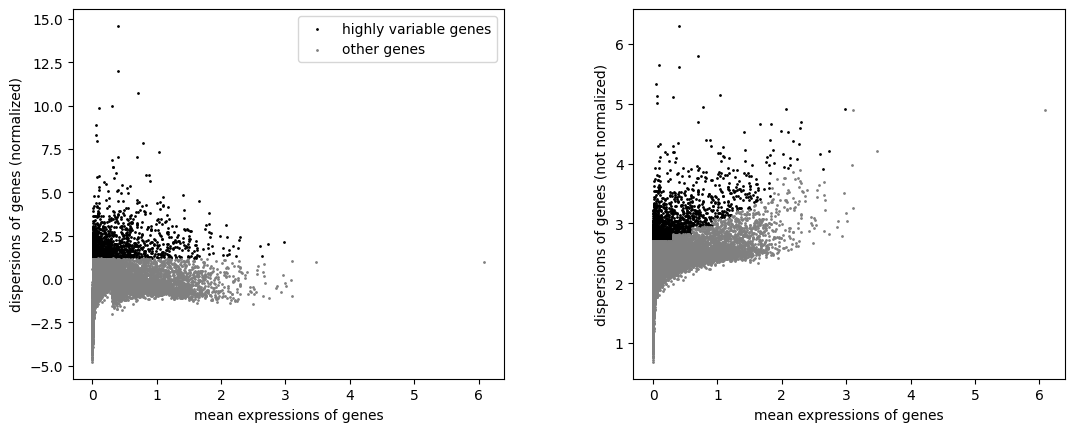

In [50]:
sc.pl.highly_variable_genes(adata)
# Genes with higher dispersion were marked as variable genes
# This is a way to reduce the number of dimesnions in the data from 24,000 genes to 10x reduction

In [51]:
# Filter out not highly variable genes
adata = adata[:, adata.var.highly_variable]

In [52]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [53]:
# regress out the differences that arised from 🔽
# get rid of the variations in the data due to proces sample quality seq artifacts
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [54]:
# Normalize each gene to the unit variants of that gene
sc.pp.scale(adata, max_value = 10)

In [55]:
# PCA to further reduce the dimensions of the data
sc.tl.pca(adata, svd_solver = 'arpack')

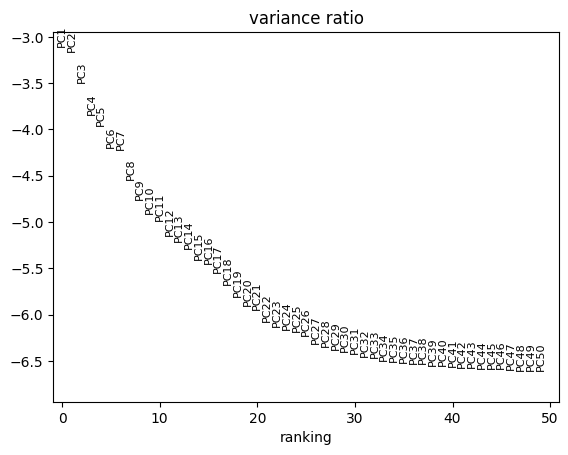

In [56]:
sc.pl.pca_variance_ratio(adata, log = True, n_pcs=50)

In [57]:
# Calculate neighbors of the cells using to 30 pcs we selected
sc.pp.neighbors(adata, n_pcs = 30)

/home/codespace/.python/current/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/codespace/.python/current/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/codespace/.python/current/lib/python3.10/site-packages/umap/distances.

In [58]:
# What are neighbors?
adata
# neighborhood matrices (obsp): distances, connectivities = cells by cell matrix
# each cell connected will get a difference

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [59]:
adata.obsp['connectivities']

<5960x5960 sparse matrix of type '<class 'numpy.float32'>'
	with 123616 stored elements in Compressed Sparse Row format>

In [60]:
adata.obsp['connectivities'].toarray()

array([[0.        , 0.05613239, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05613239, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [61]:
adata.obsp['distances'].toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.20107079,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
# Use umap function to project the data from 30 dimensions to 2 dimensions
sc.tl.umap(adata)

/home/codespace/.python/current/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


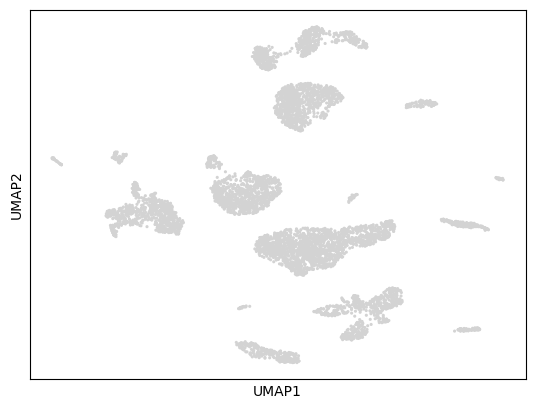

In [63]:
sc.pl.umap(adata)

In [64]:
%pip install leidenalg

  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/24/76/0dc45c635cd46a18c77104da0c7ee03076e501b65aa4c8c809b75f9bd0f6/leidenalg-0.10.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/e4/00/dd03a33a26d684cfdeab9b408daf480fcef1605e3e213c1936728b4e7673/igraph-0.10.6-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.1 MB/s eta 0:00:00:00:01


Note: you may need to restart the kernel to use updated packages.


In [65]:
# resolution closer to 1 = more clusters
# closer to 0 = fewer clusters
sc.tl.leiden(adata, resolution = 0.5)

/home/codespace/.python/current/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


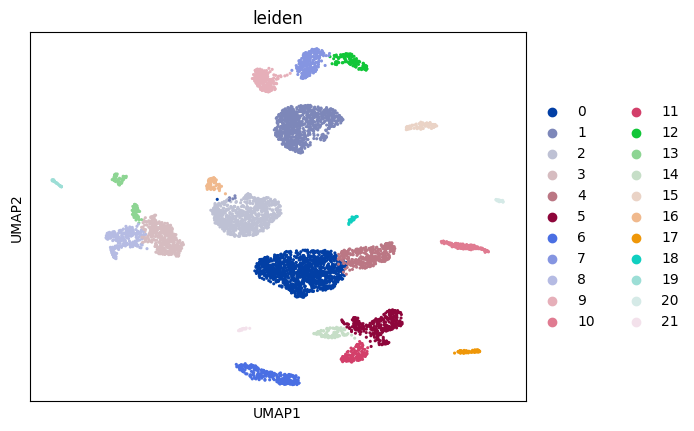

In [66]:
# Plot umap and color the cells based on leiden label
sc.pl.umap(adata, color = 'leiden')

In [67]:
!python -c "import torch; print(torch.cuda.is_available())"

False


In [68]:
!pip show dill


## Integration

In [70]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    
    
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]
    
    return adata



In [71]:
import os

In [73]:
output = []
for file in os.listdir('/workspaces/scRNA-Sequencing-of-Human-Lung-Dataset/'):
    out.append(pp('/workspaces/scRNA-Sequencing-of-Human-Lung-Dataset/' + file))

NameError: name 'out' is not defined